In [21]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.spines as spines
import numpy as np
from matplotlib import image

## READ DATA 

In [7]:
PATH = r'../data/'

In [8]:
team_xg            = pd.read_pickle(''.join([PATH, 'team_xg_gw', '24', '.p']))

In [9]:
team_xg.head()

,KOL,GOSP,GOŚĆ,ST GOSP,ST GOŚĆ,ST C GOSP,ST C GOŚĆ,G GOSP,G GOŚĆ,xG GOSP,xG GOŚĆ,xG/s gosp,xG/s gość,% GOSP,% REMIS,% GOŚĆ
0,1,Arka,Jagiellonia,14,10,2,4,0,3,1.00,1.55,0.07,0.15,23%,26%,51%
1,1,ŁKS,Lechia,25,8,7,5,0,0,1.22,0.50,0.05,0.06,54%,31%,15%
2,1,Raków,Korona,5,16,1,10,0,1,0.34,2.42,0.07,0.15,3%,11%,85%
3,1,Wisła K,Śląsk,10,16,4,5,0,1,0.84,1.39,0.08,0.09,22%,28%,50%
4,1,Piast,Lech,8,20,3,7,1,1,1.10,1.88,0.14,0.09,21%,23%,56%


In [ ]:
Objaśnienie nagłówków kolumn:
KOL. – numer kolejki
GOSP – drużyna gospodarzy
GOŚĆ – drużyna gości
st gosp – liczba strzałów w meczu drużyny gospodarzy
st gość – liczba strzałów w meczu drużyny gości
st c gosp – liczba strzałów celnych w meczu drużyny gospodarzy
st c gość – liczba strzałów celnych w meczu drużyny gości
G gosp – liczba bramek w meczu drużyny gospodarzy (bez bramek samobójczych)
G gość – liczba bramek w meczu drużyny gości (bez bramek samobójczych)
xG gosp – wynik Expected Goals w meczu drużyny gospodarzy (włącznie z rzutem karnym, liczonym jako 0,75)
xG gość – wynik Expected Goals w meczu drużyny gości (włącznie z rzutem karnym, liczonym jako 0,75)
xG/s gosp – średnia ExpG dla jednego strzału w meczu drużyny gospodarzy
xG/s gośc – średnia ExpG dla jednego strzału w meczu drużyny gości
% gosp – prawdopodobieństwo wygranej gospodarzy na bazie wyniku Expected Goals
% remis – prawdopodobieństwo remisu na bazie wyniku Expected Goals
% gość – prawdopodobieństwo wygranej gości na bazie wyniku Expected Goals

## INTRO

In [10]:
all_teams = team_xg['GOSP'].unique()
all_teams_df = pd.DataFrame(all_teams)

In [4]:
# TEAM AVERAGES

def get_teams_avg_xg(team, index):
    team_name = team
    
    frame = team_xg.loc[(team_xg['GOSP'] == team_name)
                       |(team_xg['GOŚĆ'] == team_name)]


    frame['oponent']       = np.where(frame['GOSP'] == team_name, frame['GOŚĆ'],    frame['GOSP'])
    frame['team']          = team_name
    frame['xg_for']        = np.where(frame['GOSP'] == team_name, frame['xG GOSP'], frame['xG GOŚĆ'])
    frame['xg_against']    = np.where(frame['GOSP'] == team_name, frame['xG GOŚĆ'], frame['xG GOSP'])
    frame['g_for']         = np.where(frame['GOSP'] == team_name, frame['G GOSP'],  frame['G GOŚĆ'])
    frame['g_against']     = np.where(frame['GOSP'] == team_name, frame['G GOŚĆ'],  frame['G GOSP'])

    # frame['avg_xg_for']    = frame['xg_for'].mean()
    all_teams_df.iloc[index]['avg_xg_for']     = frame['xg_for'].mean()
    all_teams_df.iloc[index]['avg_xg_against'] = frame['xg_against'].mean()
    
    return all_teams_df

In [13]:
frames = []
for team_name in all_teams:
    frame = team_xg.loc[(team_xg['GOSP'] == team_name)
                       |(team_xg['GOŚĆ'] == team_name)].copy()
    
    frame['team']          = team_name
    frame['home_away']     = np.where(frame['GOSP'] == team_name, 'home', 'away')
    frame['oponent']       = np.where(frame['GOSP'] == team_name, frame['GOŚĆ'],    frame['GOSP'])
    frame['g_for']         = np.where(frame['GOSP'] == team_name, frame['G GOSP'],  frame['G GOŚĆ'])
    frame['g_against']     = np.where(frame['GOSP'] == team_name, frame['G GOŚĆ'],  frame['G GOSP'])
    frame['xg_for']        = np.where(frame['GOSP'] == team_name, frame['xG GOSP'], frame['xG GOŚĆ'])
    frame['xg_against']    = np.where(frame['GOSP'] == team_name, frame['xG GOŚĆ'], frame['xG GOSP'])
    
    frame['result'] = [np.nan for x in range(len(frame))]
    frame['result'].mask(frame['g_for'] > frame['g_against'], 'win', inplace=True)
    frame['result'].mask(frame['g_for'] < frame['g_against'], 'lose', inplace=True)
    frame['result'].mask(frame['g_for'] == frame['g_against'], 'draw', inplace=True)
    
    frame['color_val'] = [np.nan for x in range(len(frame))]
    frame['color_val'].mask(frame['g_for'] > frame['g_against'], '#4dc774', inplace=True)
    frame['color_val'].mask(frame['g_for'] < frame['g_against'], '#ce4141', inplace=True)
    frame['color_val'].mask(frame['g_for'] == frame['g_against'], 'white',  inplace=True)
    
    frame['xg_for-xg_against']         = frame['xg_for'] - frame['xg_against']
    frame['xg_for-g_for']              = frame['xg_for'] - frame['g_for']
    frame['xg_against-g_against']      = frame['xg_against'] - frame['g_against']
    
    frame['score'] = frame['G GOSP'].astype(str) +' : '+ frame['G GOŚĆ'].astype(str)
    frames.append(frame)

In [14]:
masterdf = pd.concat(frames)

In [16]:
masterdf.head()

,KOL,GOSP,GOŚĆ,ST GOSP,ST GOŚĆ,ST C GOSP,ST C GOŚĆ,G GOSP,G GOŚĆ,xG GOSP,...,g_for,g_against,xg_for,xg_against,result,color_val,xg_for-xg_against,xg_for-g_for,xg_against-g_against,score
0,1,Arka,Jagiellonia,14,10,2,4,0,3,1.00,...,0,3,1.00,1.55,lose,#ce4141,-0.55,1.00,-1.45,0 : 3
15,2,Pogoń,Arka,12,8,4,5,2,0,0.77,...,0,2,0.73,0.77,lose,#ce4141,-0.04,0.73,-1.23,2 : 0
16,3,Arka,Korona,18,9,2,3,1,1,1.45,...,1,1,1.45,0.66,draw,white,0.79,0.45,-0.34,1 : 1
26,4,Zagłębie,Arka,18,9,5,4,2,0,1.99,...,0,2,0.29,1.99,lose,#ce4141,-1.70,0.29,-0.01,2 : 0
33,5,Arka,Lech,18,21,4,8,0,0,0.89,...,0,0,0.89,1.41,draw,white,-0.52,0.89,1.41,0 : 0


In [19]:
def txg(team_name):
    frame = team_xg.loc[(team_xg['GOSP'] == team_name)
                       |(team_xg['GOŚĆ'] == team_name)].copy()
    
    frame['team']          = team_name
    frame['home_away']     = np.where(frame['GOSP'] == team_name, 'home', 'away')
    frame['oponent']       = np.where(frame['GOSP'] == team_name, frame['GOŚĆ'],    frame['GOSP'])
    frame['g_for']         = np.where(frame['GOSP'] == team_name, frame['G GOSP'],  frame['G GOŚĆ'])
    frame['g_against']     = np.where(frame['GOSP'] == team_name, frame['G GOŚĆ'],  frame['G GOSP'])
    frame['xg_for']        = np.where(frame['GOSP'] == team_name, frame['xG GOSP'], frame['xG GOŚĆ'])
    frame['xg_against']    = np.where(frame['GOSP'] == team_name, frame['xG GOŚĆ'], frame['xG GOSP'])
    
    frame['result'] = [np.nan for x in range(len(frame))]
    frame['result'].mask(frame['g_for'] > frame['g_against'], 'win', inplace=True)
    frame['result'].mask(frame['g_for'] < frame['g_against'], 'lose', inplace=True)
    frame['result'].mask(frame['g_for'] == frame['g_against'], 'draw', inplace=True)
    
    frame['color_val'] = [np.nan for x in range(len(frame))]
    frame['color_val'].mask(frame['g_for'] > frame['g_against'], '#4dc774', inplace=True)
    frame['color_val'].mask(frame['g_for'] < frame['g_against'], '#ce4141', inplace=True)
    frame['color_val'].mask(frame['g_for'] == frame['g_against'], 'white',  inplace=True)
    
    frame['xg_for-xg_against']         = frame['xg_for'] - frame['xg_against']
    frame['xg_for-g_for']              = frame['xg_for'] - frame['g_for']
    frame['xg_against-g_against']      = frame['xg_against'] - frame['g_against']
    
    #df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']
    frame['score'] = frame['G GOSP'].astype(str) +' : '+ frame['G GOŚĆ'].astype(str)
    
    return frame

In [25]:
def team_xg_plot(team):
    color_background = '#00223E'
    color_good = '#4dc774'
    color_bad =  '#ce4141' #ff6768
    
    teamname = team['team'].iloc[0]
    
    #plot team badge in top left corner of a plot 
    IMGDIR = r'C:/users/lowicki/OneDrive - TomTom/Desktop/football_analysis/images/'
    imgpath = ''.join([IMGDIR,teamname+'.png'])
    img = image.imread(imgpath)
    height = 38
    fig = plt.figure(figsize=(15,10), tight_layout=True)
    ax  = fig.add_subplot(111)
    fig.set_facecolor(color_background)
    ax.set_facecolor(color_background)
    fig.figimage(img, 80,600 , zorder=1, alpha=1)
    
    
    sns.lineplot(data=team, x='KOL', y='xg_for',     color=color_good, alpha=0.4)
    sns.lineplot(data=team, x='KOL', y='xg_against', color=color_bad,  alpha=0.4)
    sns.regplot(x="KOL", y="xg_for",     data=team, ci=None, color=color_good, label='xG dla'   )
    sns.regplot(x="KOL", y="xg_against", data=team, ci=None, color=color_bad , label='xG przeciw')
    
    legend = plt.legend(loc=1, frameon=False, fontsize='medium')
    plt.setp(legend.get_texts(), color='w')
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_ylabel('xG')
    ax.set_xlabel('KOLEJKA')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')
    
#     plt.gcf().text(0.12, 0.9, 'Average location - Cracovia', fontsize=14, color='white')
#     plt.gcf().text(0.85, 1, 'Patryk Łowicki', fontsize=14, color='white')
    plt.gcf().text(0.4, 0.97, 'źródło: Ekstrastats | Patryk Łowicki', fontsize=14, color='white')  
    
    for i in range(len(team)):
        row = team.iloc[i]
        oponent     = row['oponent'][:3].upper()
        xg_for      = str(row['xg_for'])
        xg_against  = str(row['xg_against'])
        g_for       = str(row['g_for'])
        g_against   = str(row['g_against'])
        g_gosp      = str(row['G GOSP'])
        g_gosc      = str(row['G GOŚĆ'])

        
        if row['home_away'] == 'home':
            txt   = '\n'.join([oponent, row['score']])
        
        else:
            txt   = '\n'.join([oponent, row['score']])
    
        plt.annotate(txt, xy=(row['KOL']-0.25, 0.1), color=row['color_val'])
        
        PATH = r'C:/Users/lowicki/football_analysis/_git/football_analysis/team_stats/team_xg/KOL24/'
        filepath = ''.join([PATH, teamname])
        plt.savefig(filepath, bbox_inches='tight')

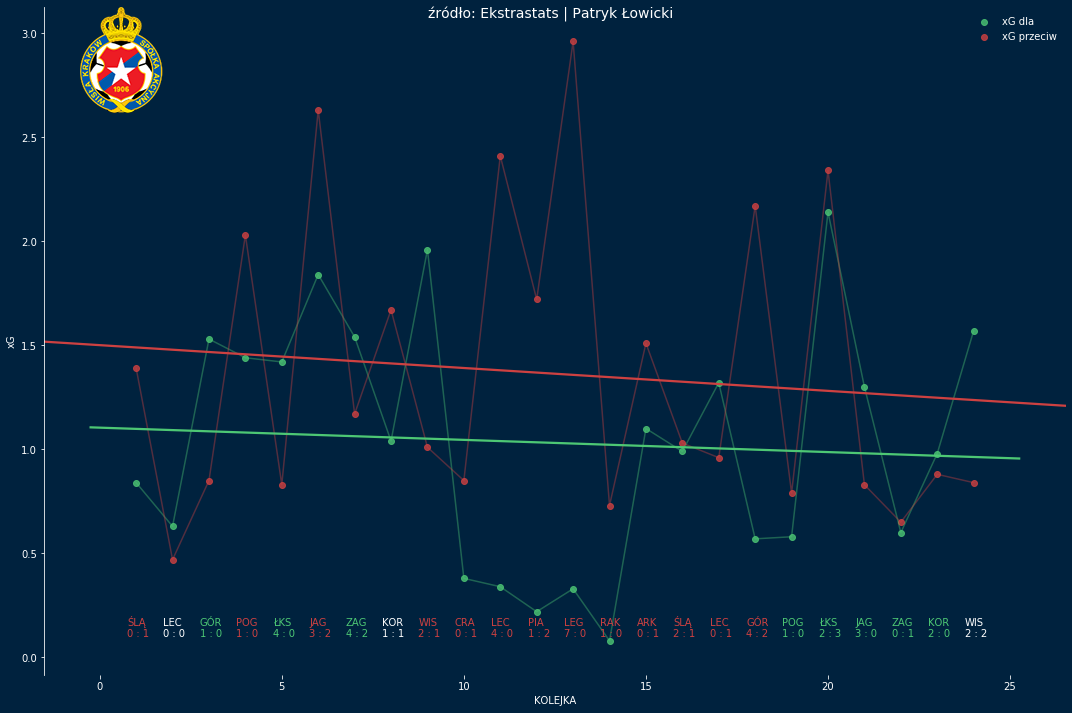

In [24]:
t = txg('Wisła K')
team_xg_plot(t)

In [114]:
IMGDIR = r'C:/users/lowicki/OneDrive - TomTom/Desktop/football_analysis/images/'

color_background = '#00223E'
color_good = '#4dc774'
color_bad =  '#ce4141'

In [31]:
def new_team_xg_plot(team):
    
    color_background = '#00223E'
    color_good = '#4dc774'
    color_bad =  '#ce4141' #ff6768
    
    teamname = team['team'].iloc[0]
    
    #plot team badge in top left corner of a plot 
    IMGDIR = r'../images/'
    imgpath = ''.join([IMGDIR,teamname+'.png'])
    img = image.imread(imgpath)
    height = 38
    fig = plt.figure(figsize=(15,10), tight_layout=True)
    ax  = fig.add_subplot(111)
    fig.set_facecolor(color_background)
    ax.set_facecolor(color_background)
    fig.figimage(img, 80,600 , zorder=1, alpha=1)
    

    plt.scatter(team['KOL']+0.2,    team['xg_for'],     color=color_good, marker='x',   label='xG dla'  )
    plt.scatter(team['KOL'],      y=team['xg_against'], color=color_bad, marker='x',    label='xG przeciw')
    plt.scatter(x=team['KOL']+0.2,    y=team['g_for'],     color=color_good, marker='o', label='Gole dla')
    plt.scatter(x=team['KOL'],        y=team['g_against'], color=color_bad, marker='o', label='Gole przeciw')
    plt.vlines( x=team['KOL']+0.2, ymin=team['g_for'],     ymax=team['xg_for'],     color=color_good, alpha=0.75)
    plt.vlines( x=team['KOL'],     ymin=team['g_against'], ymax=team['xg_against'], color=color_bad, alpha=0.75)
    

    legend = plt.legend(loc=1, frameon=False, fontsize='medium')
    plt.setp(legend.get_texts(), color='w')
    
    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_ylabel('xG')
    ax.set_xlabel('KOLEJKA')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')

    plt.gcf().text(0.4, 0.97, 'Patryk Łowicki  /  źródło: Ekstrastats', fontsize=14, color='white', alpha=0.8)  
    
    plt.grid(axis='y', which='major', alpha=0.20, linestyle='-')
    
    for i in range(len(team)):
        row = team.iloc[i]
        oponent     = row['oponent'][:3].upper()
        xg_for      = str(row['xg_for'])
        xg_against  = str(row['xg_against'])
        g_for       = str(row['g_for'])
        g_against   = str(row['g_against'])
        g_gosp      = str(row['G GOSP'])
        g_gosc      = str(row['G GOŚĆ'])

        
        if row['home_away'] == 'home':
            txt   = '\n'.join([oponent, row['score']])
        
        else:
            txt   = '\n'.join([oponent, row['score']])
    
        plt.annotate(txt, xy=(row['KOL']-0.25, -0.3), color=row['color_val'], zorder=10)

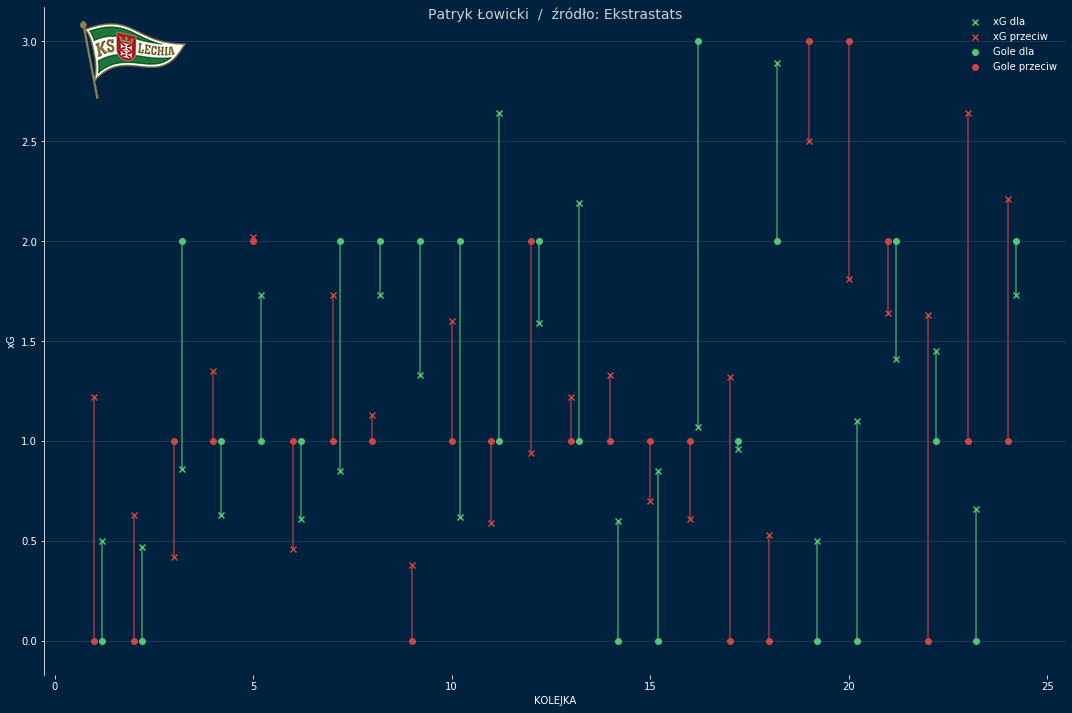

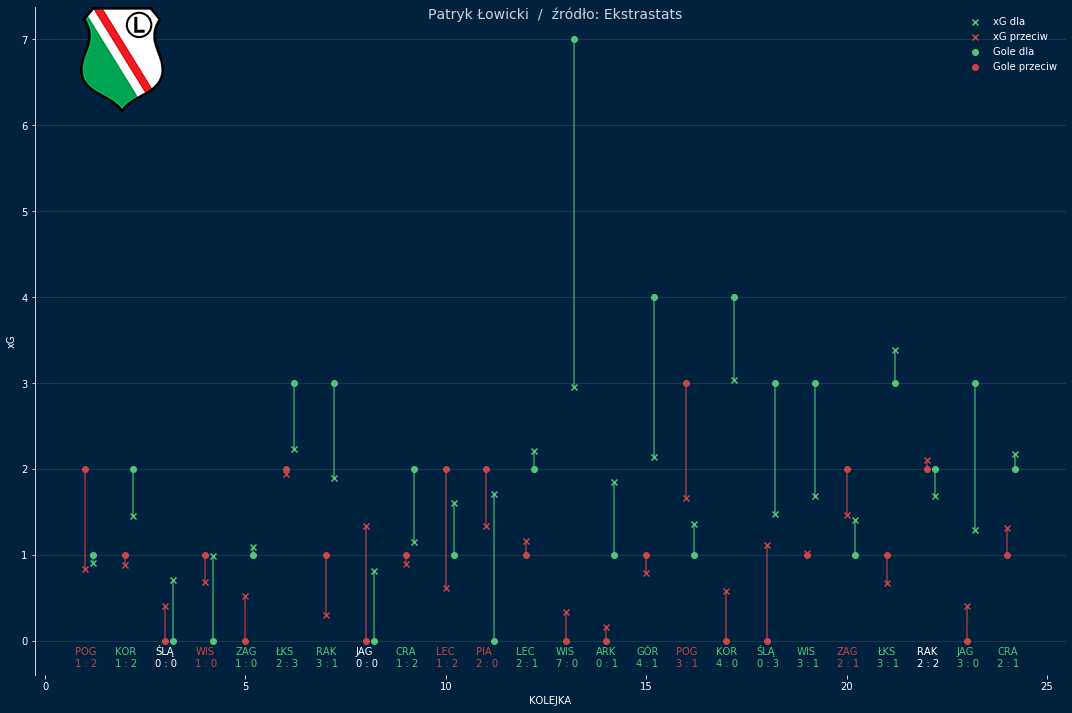

In [28]:
t = txg('Lechia')
new_team_xg_plot(t)

t = txg('Legia')
new_team_xg_plot(t)